In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import simulation as sim
import plot as pl
sns.set_context('talk')
sns.set_style("ticks")

In [21]:
enames = {'ET_NRK1': 'NadR', 'ET_NT5': 'SurE', 'ET_NMNAT1': 'NadD', 'ET_NAPRT': 'PncB', 'ET_NADS': 'NadE',
          'ET_NAMPT': 'Nampt', 'ET_PNCA': 'PncA'}

# df = pd.read_csv('../data/new_PN_Keq_min_ratio.csv', sep='\t', index_col=0)
df = pd.read_csv('../data/new_PN_Keq_min_ratio_1.csv', sep='\t', index_col=0)
if not 'objective' in df.columns:
    df['objective'] = 'min_ratio'
df = df.rename(columns=enames)
try:
    df.pathway = df.pathway.replace({'NAMPT': 'Nampt', 'PNCA': 'PncA'})
except AttributeError:
    df.loc[(df.PncA < 1), 'pathway'] = 'Nampt'
    df.loc[(df.Nampt < 1), 'pathway'] = 'PncA'
df1 = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0).reset_index()

In [22]:
df1 = df1[(df1.objective == 'min_ratio') & (df1.pathway.isin(['Nampt', 'PncA']))]

In [23]:
df1[(df1.objective == 'min_ratio') & (df1.pathway=='PncA')]

,Temperature,NadE,Nampt,PncB,NadD,NadR,SurE,PncA,ET_PNP,ET_SIRT,Sol,objective,pathway
63,50.0,674524.773857,0.000004,5642.698524,19922.980221,37518.781677,100.000000,125267.829923,1000000.000000,39142.590786,4.000071,min_ratio,PncA
71,50.0,1000000.000000,0.077296,1000000.000000,463712.307502,438.765757,100.000000,150777.945435,424.629950,633744.750790,4.000017,min_ratio,PncA
126,50.0,971506.630014,0.000123,1000000.000000,67857.534040,100.000000,117.356331,1000000.000000,1604.313709,58279.166478,4.000083,min_ratio,PncA
128,50.0,167479.710660,0.000002,660.686098,76645.575052,7571.944728,100.000000,984778.839849,100.000000,4083.311880,4.000359,min_ratio,PncA
161,50.0,124622.945782,0.000002,12375.579569,62831.314591,32960.459643,100.000000,531639.520765,193.335226,19543.202303,4.000209,min_ratio,PncA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,90.0,1000000.000000,0.926867,96800.291571,298778.838883,326121.765293,100.000000,159480.181613,100.000000,641837.370242,4.000027,min_ratio,PncA
4883,90.0,614210.835517,0.000643,4851.672111,72971.088059,913672.449120,100.000000,478294.147708,30263.383207,31151.826626,4.000112,min_ratio,PncA
4889,90.0,429136.698332,0.000098,13586.669014,71427.534406,31253.332122,100.000000,87991.205033,316476.952612,69696.822080,4.000142,min_ratio,PncA
4896,90.0,207074.681839,0.000011,121018.674633,23252.005979,191.514876,100.000000,26446.592454,100.000000,117043.689729,4.000150,min_ratio,PncA


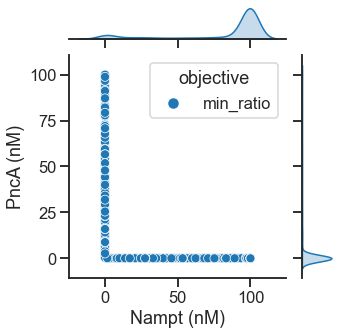

In [24]:
scaling = 1e-10 * 1e-3 * 1e9
df_ = df1[df1.objective == 'min_ratio']
jp = sns.jointplot(data=df_, x=df_["Nampt"]*scaling, y=df_["PncA"]*scaling, hue="objective", space=0.5, height=5)
jp.set_axis_labels('Nampt (nM)', 'PncA (nM)')
# jp.savefig('../images/new_jointplot_min_ratio.png', dpi=300)

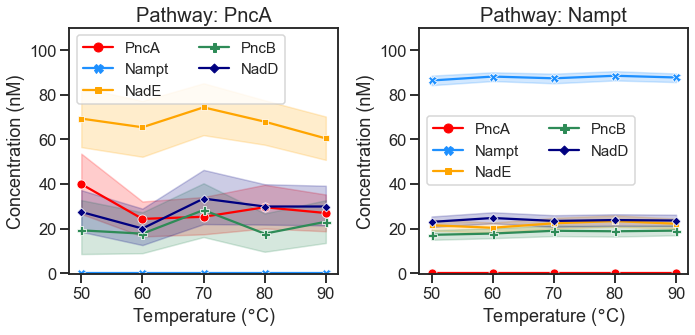

In [26]:
pl.subplot_abundance_objective(df=df1, objective='min_ratio', scaling=1e-10 * 1e-3 * 1e9, 
                               l1='upper left', l2='center left',figsize=(10, 5), ncol=2, 
                               ylim1=[-5e-1, 1.1e2], ylim2=[-5e-1, 1.1e2])#, filename='../images/new_optimisedET_min_ratio.png')

In [13]:
F = pd.read_csv('../data/new_Flux_min_ratio.csv', sep='\t', index_col=0)
F = sim.calculateATPconsFlux(F).reset_index()
F.pathway = F.pathway.replace({'NAMPT': 'Nampt', 'PNCA': 'PncA'})
cols = ['PNCA', 'NAPRT', 'NMNAT1-NaMN', 'NADS', 'SIRT', 'NAMPT', 'NMNAT1-NMN',
       'NT5-NaMN', 'NT5-NMN', 'NRK1-NMN', 'PNP-NR', 'NRK1-NaMN', 'PNP-NAR',
       'NMN thermolysis', 'NaMN thermolysis', 'NAR thermolysis',
       'NR thermolysis', 'NAD thermolysis', 'ATP consumption', 'NAD production', 'ATPconsNADprod',
       'pathway', 'objective']

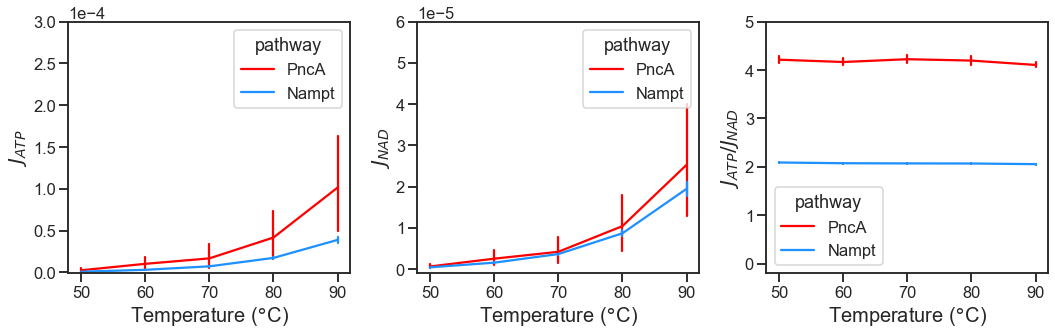

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
lp = sns.lineplot(data=F, x=F.temperature, y='ATP consumption', hue='pathway', hue_order=['PncA', 'Nampt'], 
                  palette=['#FF0000', '#1E90FF'], ax=ax[0], err_style='bars')
ax[0].set_ylabel('$J_{ATP}$', fontsize=20)
ax[0].set_xlabel('Temperature ($\degree$C)', fontsize=20)
ax[0].ticklabel_format(style='scientific', axis='y', scilimits=(-3, 6))
ax[0].set_ylim([-1e-6, 3e-4])

lp = sns.lineplot(data=F, x=F.temperature, y='NAD production', hue='pathway', hue_order=['PncA', 'Nampt'],
                  palette=['#FF0000', '#1E90FF'], ax=ax[1], err_style='bars')
ax[1].set_ylabel('$J_{NAD}$', fontsize=20)
ax[1].set_xlabel('Temperature ($\degree$C)', fontsize=20)
ax[1].ticklabel_format(style='scientific', axis='y', scilimits=(-5, 6))
# ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax[1].set_ylim([-1e-6, 6e-5])

lp = sns.lineplot(data=df1, x=df1.Temperature, y=df1.Sol, hue='pathway', hue_order=['PncA', 'Nampt'],
                  palette=['#FF0000', '#1E90FF'], ax=ax[2], err_style='bars')
ax[2].set_ylabel('$J_{ATP}/J_{NAD}$', fontsize=20)
ax[2].set_xlabel('Temperature ($\degree$C)', fontsize=20)
ax[2].ticklabel_format(style='scientific', axis='y', scilimits=(-4, 1))
ax[2].set_ylim([-2e-1, 5])
plt.tight_layout()
fig.savefig('../images/flux_min_ratio.png', dpi=300)

In [19]:
df = pd.read_csv('../data/new_PN_Keq_min_ratio.csv', sep='\t', index_col=0)


In [27]:
# df[(df.objective=='min_ratio') & (df.ET_PNCA<0.001)]
df[(df.objective=='min_ratio') & (df.ET_NAMPT<0.001)]

,ET_NADS,ET_NAMPT,ET_NAPRT,ET_NMNAT1,ET_NRK1,ET_NT5,ET_PNCA,ET_PNP,ET_SIRT,Sol,pathway,objective
Temperature,,,,,,,,,,,,
60.0,212338.224964,0.000001,168428.883829,444.312434,1823.067772,0.162294,16802.333885,1.794690,21950.430544,4.000115,PNCA,min_ratio
60.0,7254.367062,0.000021,44477.168585,0.289829,5.820715,0.000001,13.654445,72553.726579,12.465375,4.137069,PNCA,min_ratio
60.0,478072.563236,0.000112,2490.583549,25.246336,331849.822626,0.000001,3431.910208,0.000001,914.953998,4.002219,PNCA,min_ratio
60.0,158184.964822,0.000272,393713.346010,30698.937538,9982.333768,2.502602,141905.600430,0.005689,42998.373328,4.000043,PNCA,min_ratio
60.0,0.000019,0.000287,670.192806,0.000154,0.455034,702.854895,0.003438,0.000182,0.008165,inf,PNCA,min_ratio
...,...,...,...,...,...,...,...,...,...,...,...,...
50.0,102.346394,0.000166,1.507248,6270.621392,0.000456,0.071737,9548.947428,320675.044156,8.217982,4.117577,PNCA,min_ratio
50.0,939.022491,0.000001,7.696296,0.026364,0.000001,0.000001,84.197076,6.544280,0.000003,4.349712,PNCA,min_ratio
50.0,67720.366175,0.000002,633213.434109,0.026289,0.000139,0.000001,110.465052,15.958286,0.059062,4.343698,PNCA,min_ratio


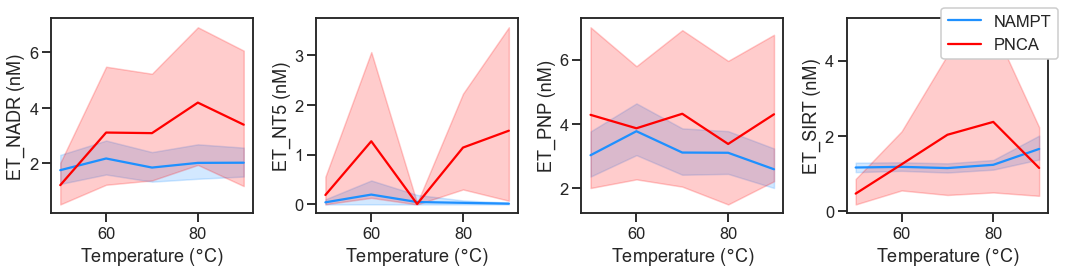

In [7]:
df = pd.read_csv('../data/new_PN_Keq_min_ratio.csv', sep='\t', index_col=0)
df = df.rename(columns=enames)
cols = ['ET_NADR', 'ET_NT5', 'ET_PNP', 'ET_SIRT']
df[cols] = df[cols] * 1e-10 * 1e-3 * 1e9
df = df.rename(columns={i:i+' (nM)' for i in cols})
pl.subplot_lineplot(df=df.drop(['ET_PNCA', 'ET_NAMPT', 'ET_NADE', 'ET_PNCB', 'ET_NADD'], axis=1), 
                    layout=(1,4), figsize=(15, 4), hue='pathway', err_style='band', palette=['#1E90FF', '#FF0000'],
                    filename='../images/se_enzymes_min_ratio.png')

ValueError: Could not interpret value `NA (mM)` for parameter `y`

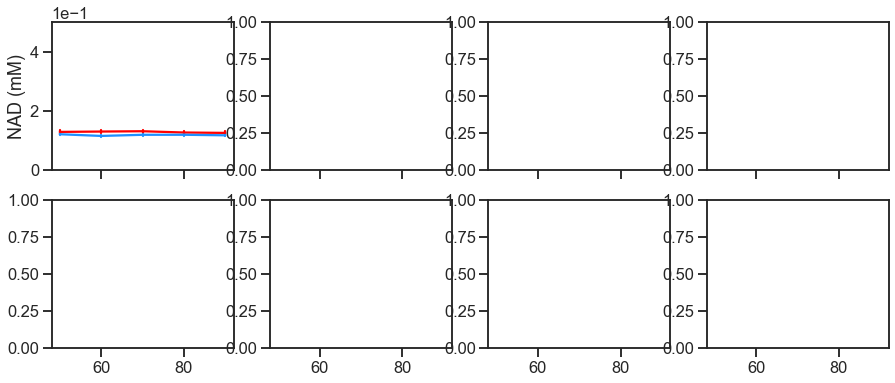

In [4]:
C = pd.read_csv('../data/new_Conc_min_ratio_1_123.csv', sep='\t')
C = C.rename(columns={'NaMN': 'NAMN', 'NaAD': 'NAAD'})
mets = ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR']
C = C.rename(columns={i: i+' (mM)' for i in mets})
pl.subplots_concentration(df=sim.u.dropConstantCol(C), layout=(2, 4), figsize=(15, 6),
                    hue='pathway', sharex=True)#, filename='../images/conc_min_ratio_1.png')

In [5]:
C

,NA,NAMN (mM),NAM (mM),NAD (mM),NAAD (mM),NMN (mM),NAR (mM),H2O,ADP,ATP,...,AMP,Gln,Glu,H3_ac,H3_deac,Pi,NR (mM),temperature,pathway,objective
0,1.982029e-04,1.716068e-02,0.126342,0.121013,2.318545e-02,0.012101,2.225159e-08,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.966248e-09,50.0,PNCA,min_ratio
1,2.850962e-04,1.956607e-02,0.010778,0.194267,5.567707e-02,0.019427,2.300956e-08,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.860547e-09,70.0,PNCA,min_ratio
2,1.439924e-01,1.422548e-02,0.000969,0.113082,1.642349e-02,0.011308,1.832677e-08,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.824300e-09,70.0,PNCA,min_ratio
3,1.009765e-03,5.819701e-03,0.160519,0.105372,1.674179e-02,0.010537,8.090433e-09,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.830265e-09,70.0,PNCA,min_ratio
4,1.039857e-05,4.098266e-04,0.107612,0.173533,1.081683e-03,0.017353,2.960761e-09,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.561849e-08,70.0,PNCA,min_ratio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,1.614887e-13,3.749516e-12,0.186889,0.102660,1.005399e-11,0.010451,6.347145e-17,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.978196e-08,70.0,NAMPT,min_ratio
4266,1.266294e-13,4.788320e-14,0.189292,0.100630,1.187370e-13,0.010078,7.456858e-18,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,5.356848e-07,70.0,NAMPT,min_ratio
4267,2.365349e-12,4.093464e-12,0.027570,0.245867,8.427735e-13,0.026563,4.808211e-17,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,5.268458e-08,70.0,NAMPT,min_ratio
4268,4.626204e-10,4.393026e-07,0.189790,0.100006,1.345712e-06,0.010202,1.750466e-11,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,5.070741e-08,70.0,NAMPT,min_ratio


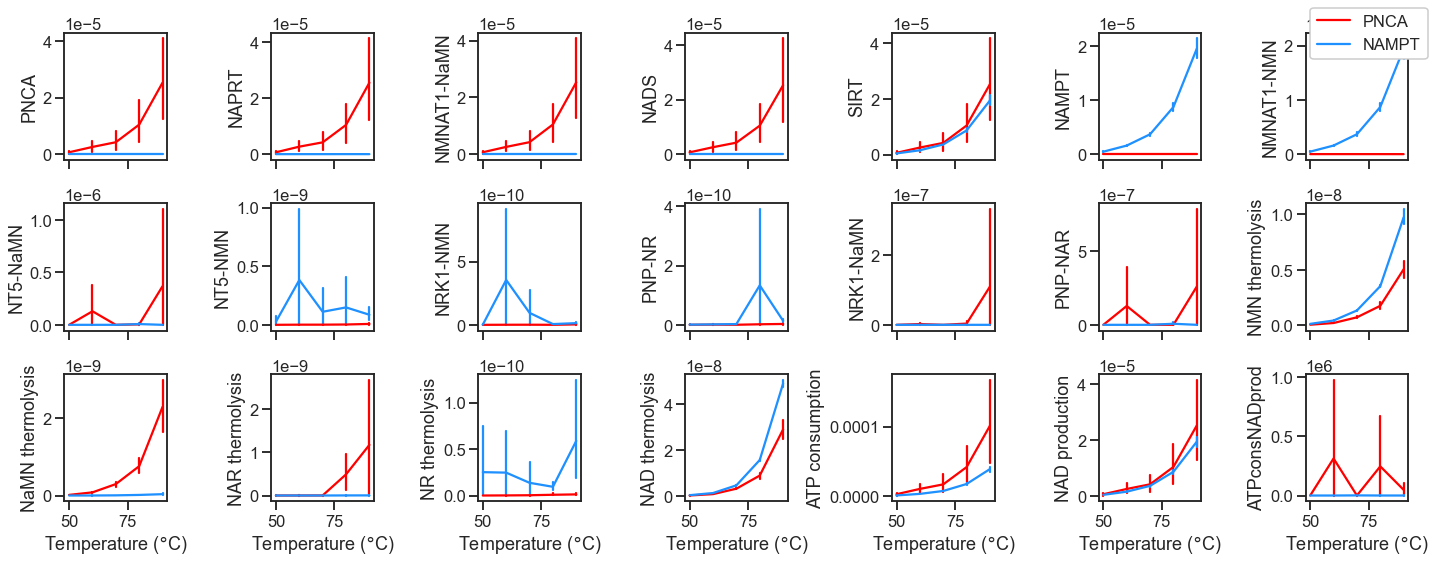

In [11]:
pl.subplot_lineplot(df=F[cols], layout=(3,7), figsize=(20,8), hue='pathway', sharex=True)

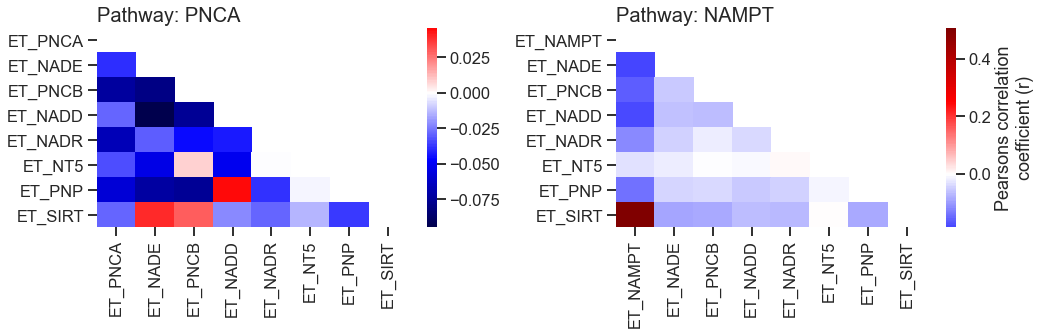

In [4]:
df = pd.read_csv('../data/new_PN_Keq_min_ratio.csv', sep='\t', index_col=0)
df = df.rename(columns=enames)
cols = ['ET_PNCA', 'ET_NAMPT', 'ET_NADE', 'ET_PNCB', 'ET_NADD', 'ET_NADR', 'ET_NT5', 'ET_PNP', 'ET_SIRT']
pl.plot_corr(dfP=df[(df.objective=='min_ratio') & (df.pathway=='PNCA')][cols[:1]+cols[2:]], 
             dfN=df[(df.objective=='min_ratio') & (df.pathway=='NAMPT')][cols[1:]], figsize=(15,5), sharey=False,
             filename='../images/new_corr_optimisedET_min_ratio.png')

In [57]:
cc = sim.task.mca('../models/new/NAD_biosynthesis_PN_Keq_min_ratio1.cps', system_variable='concentration', verbose=True)

Scaled Concentration Control Coefficients
Size of the matrix is: 8 rows x 19 columns


In [58]:
cc['temp'] = 50

In [60]:
cc.append(cc)

,(PNCA),(NAPRT),(NMNAT1-NaMN),(NADS),(SIRT),(NAMPT),(NMNAT1-NMN),(NT5-NaMN),(NT5-NMN),(NRK1-NMN),(PNP-NR),(NRK1-NaMN),(PNP-NAR),(NMN thermolysis),(NaMN thermolysis),(NAR thermolysis),(NR thermolysis),(NAD thermolysis),'Summation Error',temp
NAM,-2.985503e-03,1.022692e+00,-2.301418e-03,0.999426,-2.435496e-03,1.022733e+00,-2.288401e-03,1.022642e+00,9.360136e-312,9.279234e+199,1.290363e-307,7.410985e-323,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,0.000000e+00,1.440340e+214,1.804439e+219,50
NaMN,3.780118e-08,1.052773e-07,3.075683e-08,-1.000006,3.135596e-08,1.052419e-07,3.058287e-08,1.052720e-07,-1.503950e-154,1.063529e-94,3.483440e+228,9.359865e-312,4.443806e+252,0.000000e+00,0.000000e+00,0.000000e+00,9.358001e-312,4.810552e+228,6.384818e+20,50
NMN,1.082170e-06,-1.523237e-03,7.877168e-07,-0.000124,8.977138e-07,9.901539e-07,7.832616e-07,-1.523161e-03,6.951950e-310,0.000000e+00,3.458460e-323,5.852818e+63,9.359865e-312,7.053155e+87,5.743715e+257,2.121996e-314,9.360136e-312,9.279234e+199,7.727820e+228,50
NA,2.935560e-03,-1.021214e+00,2.299982e-03,-0.081626,2.434950e-03,-1.022779e+00,2.286973e-03,-1.021163e+00,0.000000e+00,7.410985e-323,7.410985e-323,6.384649e+20,0.000000e+00,9.359538e-312,9.360296e-312,9.360283e-312,-1.886398e-310,1.063529e-94,3.483440e+228,50
NAD,2.523090e+00,2.308422e+00,3.204829e-02,2.255922,-1.962093e-02,2.308532e+00,3.186703e-02,2.308308e+00,1.076626e+277,0.000000e+00,6.951950e-310,0.000000e+00,6.951950e-310,0.000000e+00,9.360248e-312,5.681755e-322,7.202077e+252,8.288597e+15,3.978983e+06,50
NaAD,-2.540210e+00,-2.324092e+00,1.655819e-02,-2.271229,1.460288e-02,-2.324196e+00,1.646454e-02,-2.323977e+00,9.359865e-312,1.677920e+243,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,6.216483e-310,9.360754e-312,7.932539e+68,3.819483e+180,1.141563e+243,50
NR,6.053440e-03,5.544821e-03,-4.871291e-02,0.005413,5.100498e-03,5.538669e-03,-4.843740e-02,5.544546e-03,0.000000e+00,9.359538e-312,2.150289e-13,0.000000e+00,7.500489e+247,7.202076e+252,9.881313e-323,0.000000e+00,1.076627e+277,2.654877e+06,9.040504e+223,50
NAR,-1.913258e-07,-1.790050e-07,-1.556279e-07,0.053179,-1.586901e-07,-1.788133e-07,-1.547477e-07,1.000000e+00,6.951950e-310,0.000000e+00,9.359865e-312,2.309556e+161,3.333953e+178,0.000000e+00,1.531604e-322,0.000000e+00,2.316491e-152,1.677920e+243,9.750238e+199,50
NAM,-2.985503e-03,1.022692e+00,-2.301418e-03,0.999426,-2.435496e-03,1.022733e+00,-2.288401e-03,1.022642e+00,9.360136e-312,9.279234e+199,1.290363e-307,7.410985e-323,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,0.000000e+00,1.440340e+214,1.804439e+219,50
NaMN,3.780118e-08,1.052773e-07,3.075683e-08,-1.000006,3.135596e-08,1.052419e-07,3.058287e-08,1.052720e-07,-1.503950e-154,1.063529e-94,3.483440e+228,9.359865e-312,4.443806e+252,0.000000e+00,0.000000e+00,0.000000e+00,9.358001e-312,4.810552e+228,6.384818e+20,50


In [2]:
def get_mca_coefficients(filepath_CPSmodel, Optdf, system_variable, **kwargs):
    Optdf = Optdf.rename(columns={'Temperature': 'temperature'})
    foldername = 'tmp/mca'
    # create a folder to save CPS models
    os.makedirs(foldername, exist_ok=True)

    coefficients = pd.DataFrame()
    for i in range(len(Optdf)):
        # create dataModel object
        dataModel = sim.task.init_dataModel(filepath_CPSmodel=filepath_CPSmodel)
        for j in range(len(Optdf.T)):
            par = Optdf.columns[j]
            value = Optdf.T[i][Optdf.columns[j]]
            sim.u.setValue(dataModel=dataModel, parameterName=par, parameterValue=value)
        filepath_cpsmodel = os.path.join(foldername, f'optimized_{Optdf.T.columns[i]}.cps')
        dataModel.saveModel(filepath_cpsmodel, True)
        try:
            coeff = sim.task.mca(filepath_CPSmodel=filepath_cpsmodel, system_variable=system_variable, verbose=False)
            coeff['temperature'] = Optdf.iloc[i]['temperature']
            coefficients = coefficients.append(coeff)
        except SystemExit:
            pass

    deleteModels = kwargs.get('deleteModels', False)
    if deleteModels == True:
        shutil.rmtree(foldername)
    return coefficients

In [3]:
df = pd.read_csv('../data/new_PN_Keq_min_ratio.csv', sep='\t')

In [4]:
df1 = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0).loc[(df.Temperature==90.0) & (df.pathway=='NAMPT')].reset_index()

In [5]:
CC_90 = get_mca_coefficients('../models/new/NAD_biosynthesis_PN_Keq_min_ratio1.cps', 
                             Optdf=df1[:100].drop(['index', 'Sol', 'pathway', 'objective'], axis=1), 
                             system_variable='concentration')

could not run mca task
>ERROR 2021-12-27T12:32:45<
  CCopasiTask (5): No output file defined for report of task 'Metabolic Control Analysis'.
could not run mca task
>ERROR 2021-12-27T12:32:47<
  CCopasiTask (5): No output file defined for report of task 'Metabolic Control Analysis'.
could not run mca task
>ERROR 2021-12-27T12:32:48<
  CCopasiTask (5): No output file defined for report of task 'Metabolic Control Analysis'.
could not run mca task
>ERROR 2021-12-27T12:32:48<
  CCopasiTask (5): No output file defined for report of task 'Metabolic Control Analysis'.
could not run mca task
>ERROR 2021-12-27T12:32:51<
  CCopasiTask (5): No output file defined for report of task 'Metabolic Control Analysis'.
could not run mca task
>ERROR 2021-12-27T12:32:52<
  CCopasiTask (5): No output file defined for report of task 'Metabolic Control Analysis'.
could not run mca task
>ERROR 2021-12-27T12:32:54<
  CCopasiTask (5): No output file defined for report of task 'Metabolic Control Analysis'.
could 

In [6]:
CC_90.to_csv('../data/CC_NAMPT_90.csv', sep='\t')

In [10]:
CC_50.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

,(PNCA),(NAPRT),(NMNAT1-NaMN),(NADS),(SIRT),(NAMPT),(NMNAT1-NMN),(NT5-NaMN),(NT5-NMN),(NRK1-NMN),(PNP-NR),(NRK1-NaMN),(PNP-NAR),(NMN thermolysis),(NaMN thermolysis),(NAR thermolysis),(NR thermolysis),(NAD thermolysis),'Summation Error',temperature
NAM,-7.657824e-04,1.014971e+00,-1.031888e-03,1.000053e+00,-2.591715e-03,1.015007e+00,-1.027778e-03,1.014942e+00,6.970654e-312,0.000000e+00,9.014097e-308,7.410985e-323,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,6.970654e-312,7.410985e-323,0.000000e+00,50.0
NaMN,7.852687e-09,4.285999e-10,1.802368e-08,-1.000003e+00,2.677932e-08,3.898886e-10,1.795190e-08,4.286170e-10,-4.958859e-310,6.970654e-312,0.000000e+00,6.970654e-312,4.261299e+257,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.384815e+20,50.0
NMN,4.441776e-07,-2.264045e-03,-1.054417e-07,-1.316630e-05,1.515158e-06,2.205357e-08,-1.050218e-07,-2.263980e-03,6.951950e-310,0.000000e+00,0.000000e+00,-6.361252e-309,6.970654e-312,6.960146e-312,6.970654e-312,2.121996e-314,0.000000e+00,9.279234e+199,1.290580e-307,50.0
NA,7.612372e-04,-1.012707e+00,1.036056e-03,-5.861930e-03,2.596244e-03,-1.015008e+00,1.031929e-03,-1.012678e+00,0.000000e+00,7.410985e-323,7.410985e-323,6.970654e-312,0.000000e+00,6.960155e-312,6.970587e-312,6.970676e-312,-4.997904e-310,1.063529e-94,3.483440e+228,50.0
NAD,9.340399e-01,4.437075e-02,-9.311147e-01,4.568048e-02,-1.385294e+00,4.637541e-02,-9.274064e-01,4.437020e-02,6.441885e+170,0.000000e+00,6.951950e-310,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,50.0
NaAD,-9.557108e-01,-4.555220e-02,1.501623e+00,-4.674122e-02,1.312011e+00,-4.745137e-02,1.495642e+00,-4.555174e-02,6.970654e-312,6.960146e-312,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,-6.388414e-309,0.000000e+00,0.000000e+00,7.410985e-323,7.410985e-323,50.0
NR,2.149538e-02,1.173097e-03,-5.702886e-01,1.052161e-03,7.353451e-02,1.067253e-03,-5.680173e-01,1.173192e-03,0.000000e+00,6.960155e-312,6.960146e-312,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.076626e+277,0.000000e+00,6.951950e-310,50.0
NAR,-2.019259e-08,-1.102112e-09,-4.634653e-08,2.995978e-03,-6.886098e-08,-1.002569e-09,-4.616195e-08,1.000001e+00,6.951950e-310,0.000000e+00,6.970654e-312,1.976328e+166,-6.324494e-310,0.000000e+00,7.410985e-323,0.000000e+00,6.970654e-312,1.677920e+243,0.000000e+00,50.0
NAM,-7.593600e-01,7.309297e-01,-4.959623e-01,7.316916e-01,-5.024676e-01,7.309297e-01,-4.943496e-01,7.293157e-01,6.960509e-312,6.960509e-312,1.400467e-76,7.410985e-323,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,6.960509e-312,7.410985e-323,3.458460e-323,50.0
NaMN,-1.836290e-05,5.702214e-05,-1.192029e-05,-1.003139e+00,-1.215072e-05,5.702214e-05,-1.188153e-05,5.689623e-05,-1.492864e-154,6.960509e-312,1.264808e-321,6.960509e-312,-4.671786e-310,0.000000e+00,0.000000e+00,0.000000e+00,1.269749e-321,6.960492e-312,-5.703925e-310,50.0


In [5]:
CC_80 = get_mca_coefficients('../models/new/NAD_biosynthesis_PN_Keq_min_ratio1.cps', 
                          Optdf=df2.drop(['index', 'Sol', 'pathway', 'objective'], axis=1), system_variable='concentration')

In [6]:
CC_80.to_csv('../data/CC_80.csv', sep='\t')

In [36]:
CC = pd.concat((pd.read_csv('../data/CC_50.csv', sep='\t', index_col=0),
               pd.read_csv('../data/CC_60.csv', sep='\t', index_col=0),
               pd.read_csv('../data/CC_70.csv', sep='\t', index_col=0),
               pd.read_csv('../data/CC_80.csv', sep='\t', index_col=0),
               pd.read_csv('../data/CC_90.csv', sep='\t', index_col=0)))

In [10]:
CC

,(PNCA),(NAPRT),(NMNAT1-NaMN),(NADS),(SIRT),(NAMPT),(NMNAT1-NMN),(NT5-NaMN),(NT5-NMN),(NRK1-NMN),(PNP-NR),(NRK1-NaMN),(PNP-NAR),(NMN thermolysis),(NaMN thermolysis),(NAR thermolysis),(NR thermolysis),(NAD thermolysis),'Summation Error',temperature
NAM,-9.117078e-01,1.760939e+00,1.273536e+00,9.557311e-01,1.273623e+00,1.000788e+00,inf,1.757926,0.000000e+00,0.000000e+00,2.682080e-310,7.410985e-323,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,0.000000e+00,7.410985e-323,0.000000e+00,50.0
NaMN,-1.988762e-09,4.050237e-07,4.829718e-07,-1.000039e+00,4.830022e-07,1.132370e-07,inf,-0.000002,-1.195128e-310,0.000000e+00,0.000000e+00,1.202581e-311,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.482197e-323,50.0
NMN,9.718382e-03,-9.534529e-01,3.470228e-02,4.355019e-04,3.469463e-02,4.949347e-04,inf,-0.951812,6.951950e-310,0.000000e+00,0.000000e+00,0.000000e+00,1.202581e-311,0.000000e+00,0.000000e+00,2.121996e-314,0.000000e+00,0.000000e+00,9.007579e-308,50.0
NaN,2.293354e-03,-5.331693e-02,8.187609e-03,1.094533e-04,8.187289e-03,-1.047103e+00,inf,-0.053228,0.000000e+00,7.410985e-323,7.410985e-323,0.000000e+00,0.000000e+00,1.202563e-311,1.202545e-311,1.202577e-311,-1.249451e-310,0.000000e+00,0.000000e+00,50.0
NAD,8.923250e-01,-7.479905e-01,-1.305642e+00,4.336585e-02,-1.305720e+00,4.544405e-02,-inf,-0.746717,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,2.311348e-01,2.077432e-01,6.882421e-01,2.263804e-01,6.974454e-01,-2.435265e+00,inf,inf,0.000000e+00,7.410985e-323,7.410985e-323,0.000000e+00,0.000000e+00,1.190362e-311,1.190346e-311,1.190361e-311,-1.547741e-154,0.000000e+00,2.667954e-322,90.0
NAD,5.021395e-01,4.276305e-01,-1.109839e+00,4.908823e-01,-1.107807e+00,1.554862e+00,-inf,inf,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,4.446591e-323,90.0
NaAD,-2.475314e-08,-2.390187e-08,1.506336e-07,-2.430878e-08,4.913842e-08,-7.664743e-08,inf,-inf,1.190342e-311,4.940656e-324,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,7.410985e-323,7.410985e-323,90.0
NR,7.806837e-05,-1.285799e-03,4.579862e-02,2.332438e-05,-2.794339e-03,2.417367e-04,-inf,inf,0.000000e+00,1.190362e-311,0.000000e+00,0.000000e+00,0.000000e+00,1.188318e-311,0.000000e+00,0.000000e+00,2.143216e-312,0.000000e+00,6.951950e-310,90.0


<AxesSubplot:xlabel='temperature', ylabel='(PNCA)'>

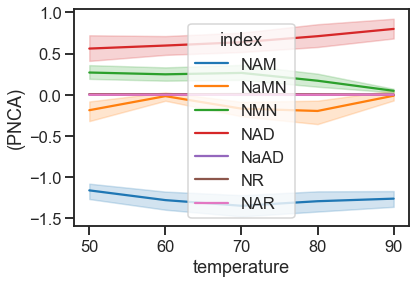

In [11]:
sns.lineplot(data=CC.reset_index(), x='temperature', y='(PNCA)', hue='index')

In [38]:
cols = {'(PNCA)': 'PNCA', '(NAPRT)': 'PNCB', '(NMNAT1-NaMN)': 'NADD-NAMN', '(NADS)': 'NADE', '(SIRT)': 'SIRT',
        '(NMNAT1-NMN)': 'NADD-NMN', '(NT5-NaMN)': 'NT5-NAMN', '(NT5-NMN)': 'NT5-NMN', '(NRK1-NMN)': 'NADR-NMN', 
        '(PNP-NR)': 'PNP-NR', '(NRK1-NaMN)': 'NADR-NAMN', '(PNP-NAR)': 'PNP-NAR'}

In [40]:
CC

,PNCA,PNCB,NADD-NAMN,NADE,SIRT,NAMPT,NADD-NMN,NT5-NAMN,NT5-NMN,NADR-NMN,PNP-NR,NADR-NAMN,PNP-NAR,(NMN thermolysis),(NaMN thermolysis),(NAR thermolysis),(NR thermolysis),(NAD thermolysis),'Summation Error',temperature
NAM,-9.117078e-01,1.760939e+00,1.273536e+00,9.557311e-01,1.273623e+00,1.000788e+00,inf,1.757926,0.000000e+00,0.000000e+00,2.682080e-310,7.410985e-323,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,0.000000e+00,7.410985e-323,0.000000e+00,50.0
NaMN,-1.988762e-09,4.050237e-07,4.829718e-07,-1.000039e+00,4.830022e-07,1.132370e-07,inf,-0.000002,-1.195128e-310,0.000000e+00,0.000000e+00,1.202581e-311,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.482197e-323,50.0
NMN,9.718382e-03,-9.534529e-01,3.470228e-02,4.355019e-04,3.469463e-02,4.949347e-04,inf,-0.951812,6.951950e-310,0.000000e+00,0.000000e+00,0.000000e+00,1.202581e-311,0.000000e+00,0.000000e+00,2.121996e-314,0.000000e+00,0.000000e+00,9.007579e-308,50.0
NaN,2.293354e-03,-5.331693e-02,8.187609e-03,1.094533e-04,8.187289e-03,-1.047103e+00,inf,-0.053228,0.000000e+00,7.410985e-323,7.410985e-323,0.000000e+00,0.000000e+00,1.202563e-311,1.202545e-311,1.202577e-311,-1.249451e-310,0.000000e+00,0.000000e+00,50.0
NAD,8.923250e-01,-7.479905e-01,-1.305642e+00,4.336585e-02,-1.305720e+00,4.544405e-02,-inf,-0.746717,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,2.311348e-01,2.077432e-01,6.882421e-01,2.263804e-01,6.974454e-01,-2.435265e+00,inf,inf,0.000000e+00,7.410985e-323,7.410985e-323,0.000000e+00,0.000000e+00,1.190362e-311,1.190346e-311,1.190361e-311,-1.547741e-154,0.000000e+00,2.667954e-322,90.0
NAD,5.021395e-01,4.276305e-01,-1.109839e+00,4.908823e-01,-1.107807e+00,1.554862e+00,-inf,inf,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,4.446591e-323,90.0
NaAD,-2.475314e-08,-2.390187e-08,1.506336e-07,-2.430878e-08,4.913842e-08,-7.664743e-08,inf,-inf,1.190342e-311,4.940656e-324,0.000000e+00,7.410985e-323,0.000000e+00,0.000000e+00,6.951950e-310,0.000000e+00,0.000000e+00,7.410985e-323,7.410985e-323,90.0
NR,7.806837e-05,-1.285799e-03,4.579862e-02,2.332438e-05,-2.794339e-03,2.417367e-04,-inf,inf,0.000000e+00,1.190362e-311,0.000000e+00,0.000000e+00,0.000000e+00,1.188318e-311,0.000000e+00,0.000000e+00,2.143216e-312,0.000000e+00,6.951950e-310,90.0


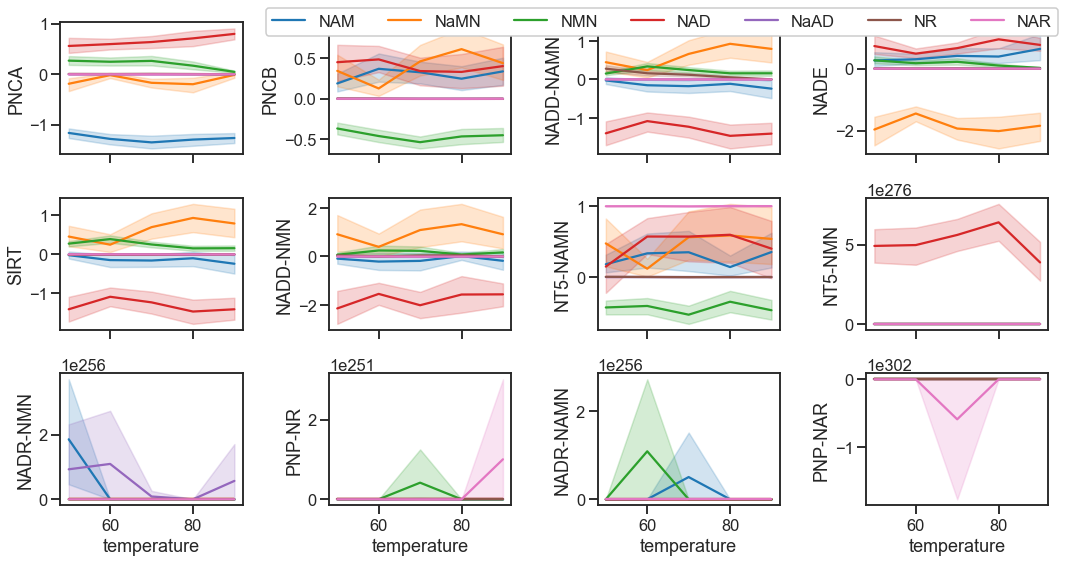

In [42]:
CC = CC.rename(columns=cols)
fig, axn = plt.subplots(3,4, figsize=(15, 8), sharex=True)
for i, ax in enumerate(axn.flat):
    lp = sns.lineplot(data=CC.reset_index().drop('NAMPT', axis=1), x='temperature', y=list(cols.values())[i], 
                      hue='index', ax=ax)
    lp.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=7, loc='upper right', framealpha=1.0)
plt.tight_layout()
plt.savefig('../images/CC_PNCA.png', dpi=300)

In [43]:
CC_NAMPT = pd.concat((pd.read_csv('../data/CC_NAMPT_50.csv', sep='\t', index_col=0),
               pd.read_csv('../data/CC_NAMPT_60.csv', sep='\t', index_col=0),
               pd.read_csv('../data/CC_NAMPT_70.csv', sep='\t', index_col=0),
               pd.read_csv('../data/CC_NAMPT_80.csv', sep='\t', index_col=0),
               pd.read_csv('../data/CC_NAMPT_90.csv', sep='\t', index_col=0)))

In [44]:
cols = {'(NAPRT)': 'PNCB', '(NMNAT1-NaMN)': 'NADD-NAMN', '(NADS)': 'NADE', '(SIRT)': 'SIRT', '(NAMPT)': 'NAMPT',
        '(NMNAT1-NMN)': 'NADD-NMN', '(NT5-NaMN)': 'NT5-NAMN', '(NT5-NMN)': 'NT5-NMN', '(NRK1-NMN)': 'NADR-NMN', 
        '(PNP-NR)': 'PNP-NR', '(NRK1-NaMN)': 'NADR-NAMN', '(PNP-NAR)': 'PNP-NAR'}

In [34]:
list(cols.values())[0]

'PNCB'

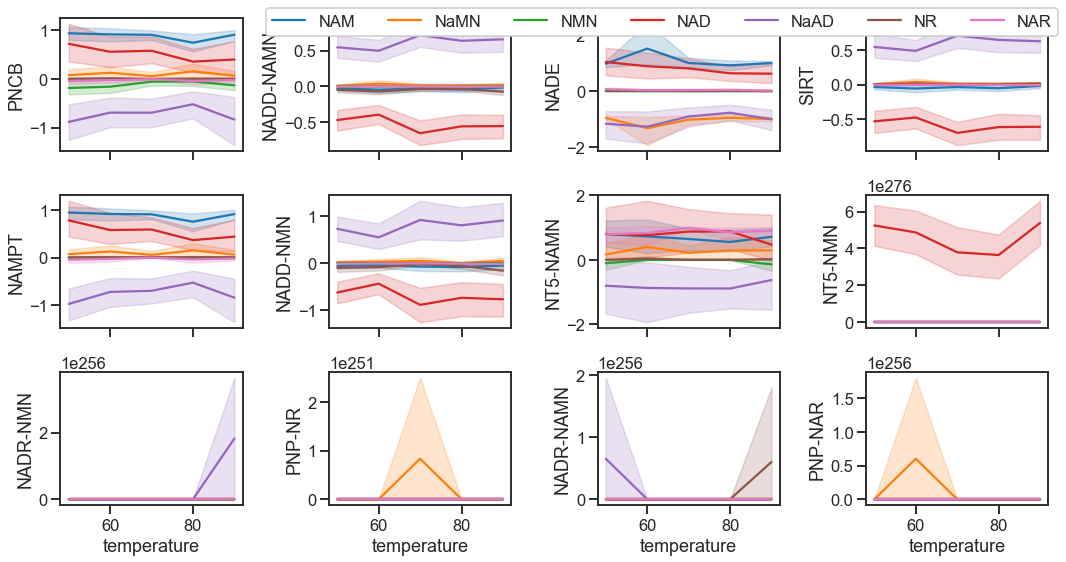

In [45]:
CC_NAMPT = CC_NAMPT.rename(columns=cols)
fig, axn = plt.subplots(3, 4, figsize=(15, 8), sharex=True)
for i, ax in enumerate(axn.flat):
    lp = sns.lineplot(data=CC_NAMPT.reset_index().drop('(PNCA)', axis=1), x='temperature', y=list(cols.values())[i], 
                      hue='index', ax=ax)
    lp.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=7, loc='upper right', framealpha=1.0)
plt.tight_layout()
plt.savefig('../images/CC_NAMPT.png', dpi=300)